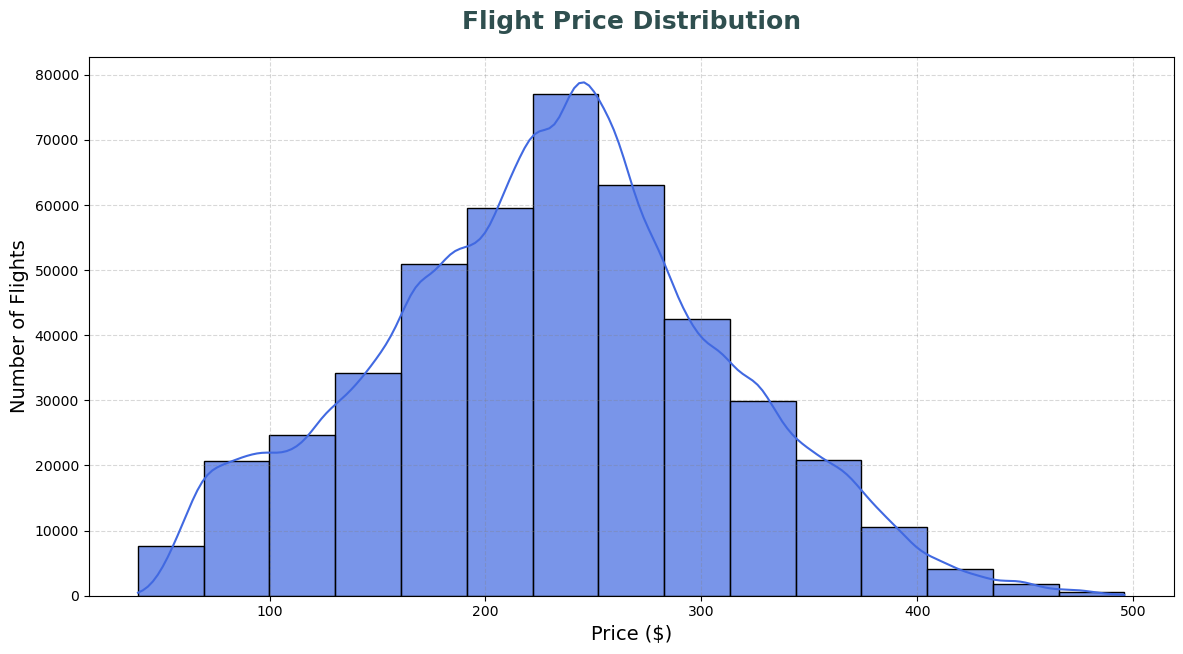

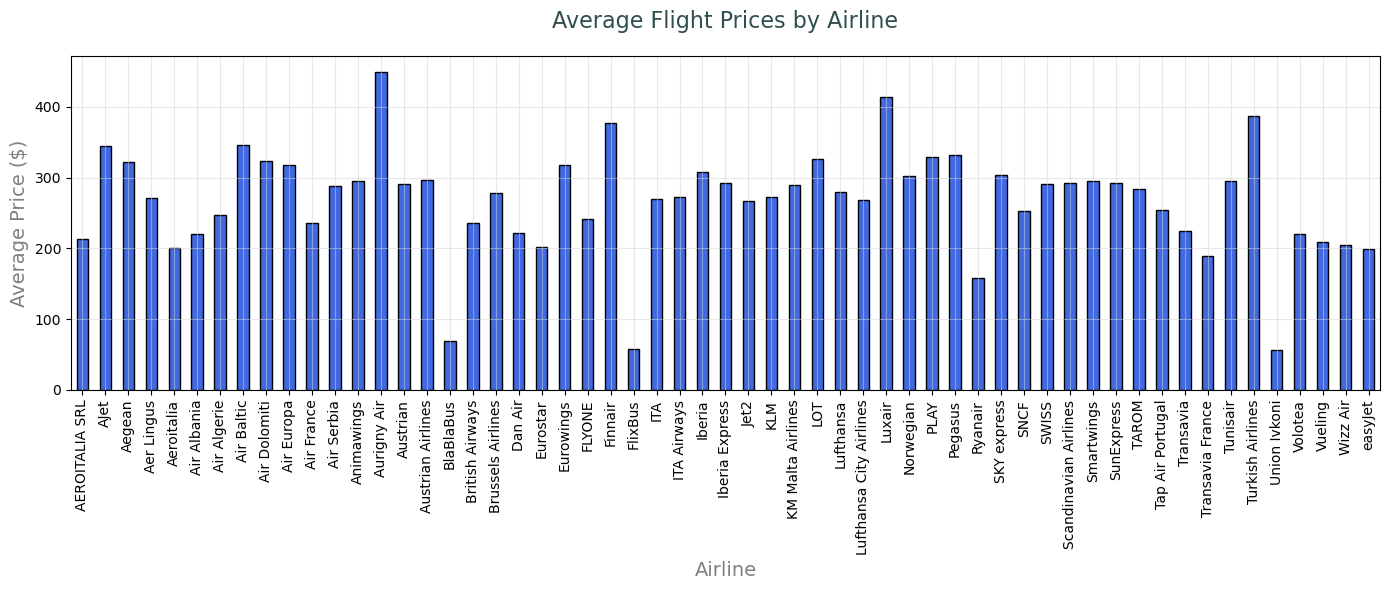

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_50487/2713116804.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="Destination", y="Price", palette='coolwarm')


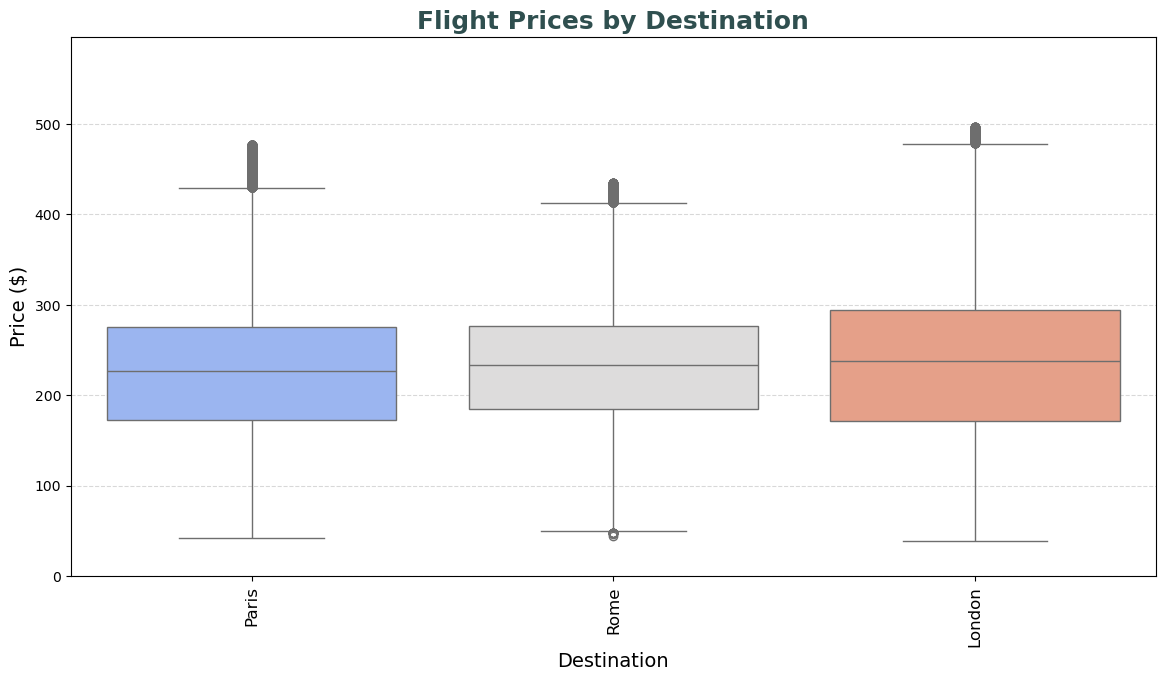

<Figure size 1400x700 with 0 Axes>

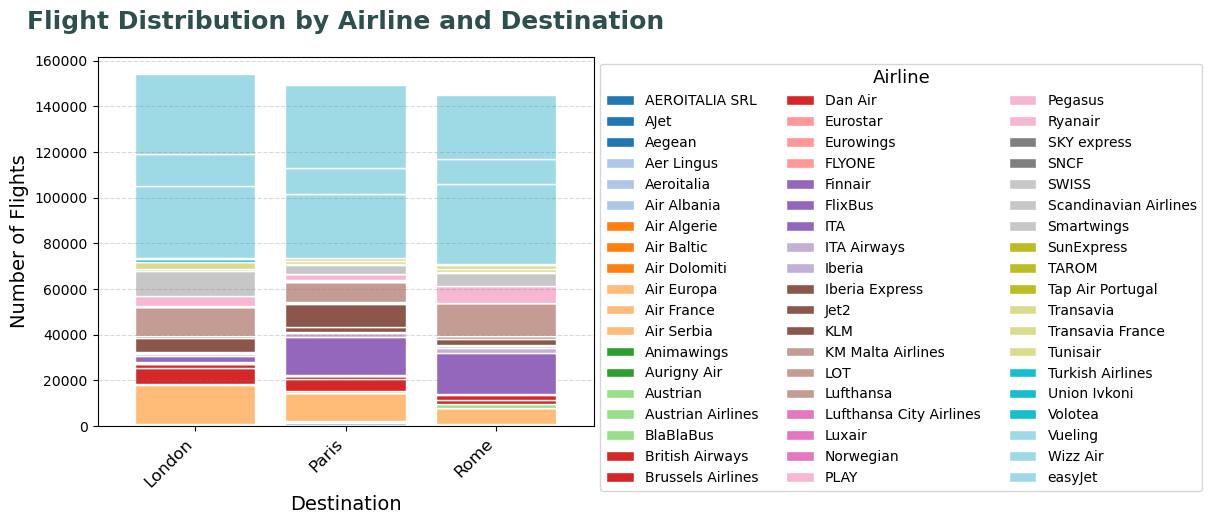

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_50487/2713116804.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Destination', y='Layover', palette='coolwarm')
/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_50487/2713116804.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Destination', y='Duration', palette='viridis')


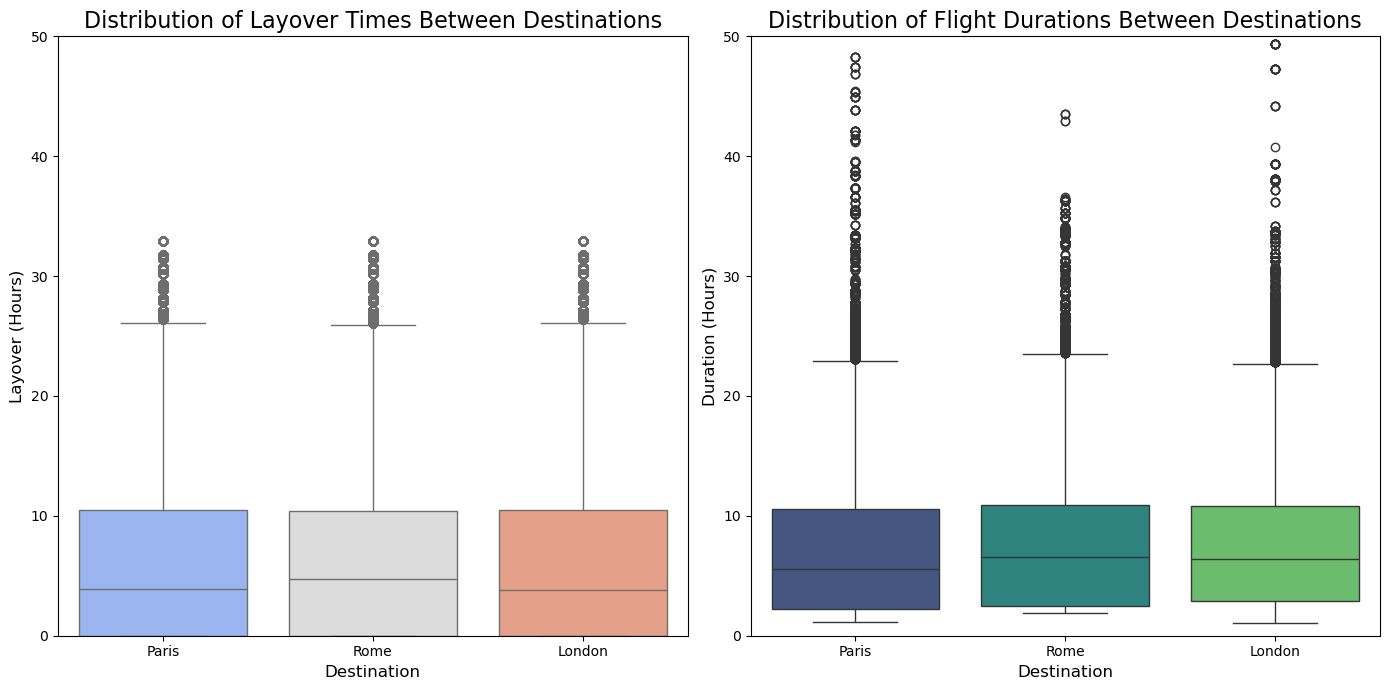

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_50487/2713116804.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Departure Airport', y='Price', palette='coolwarm')


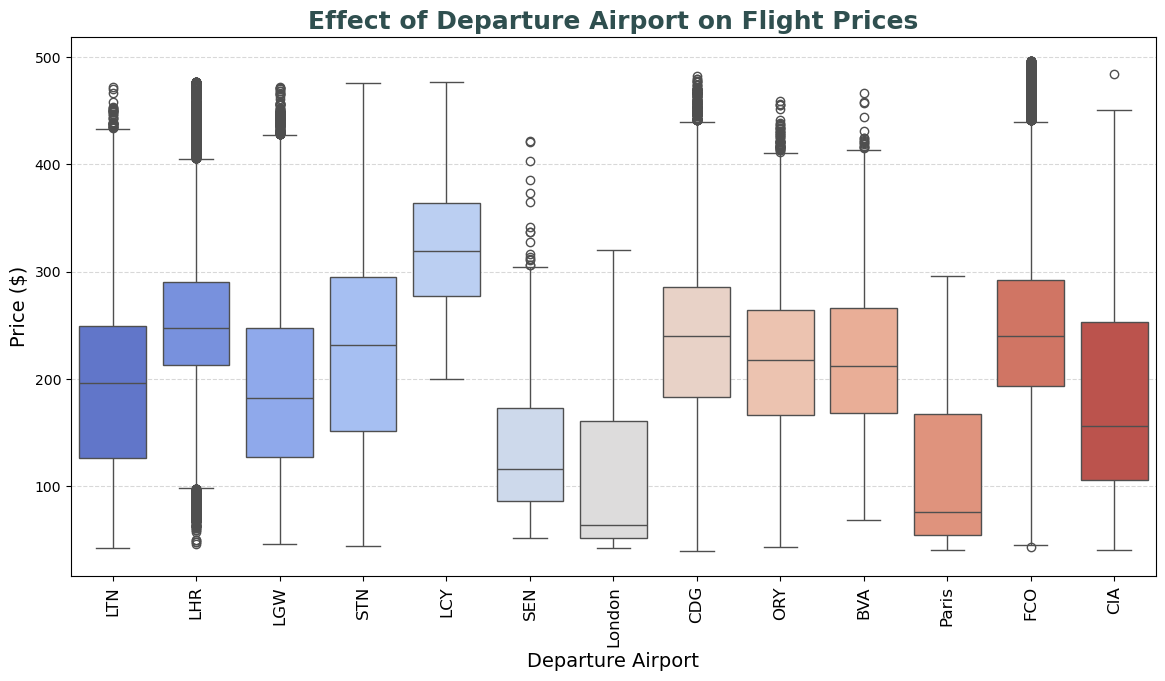

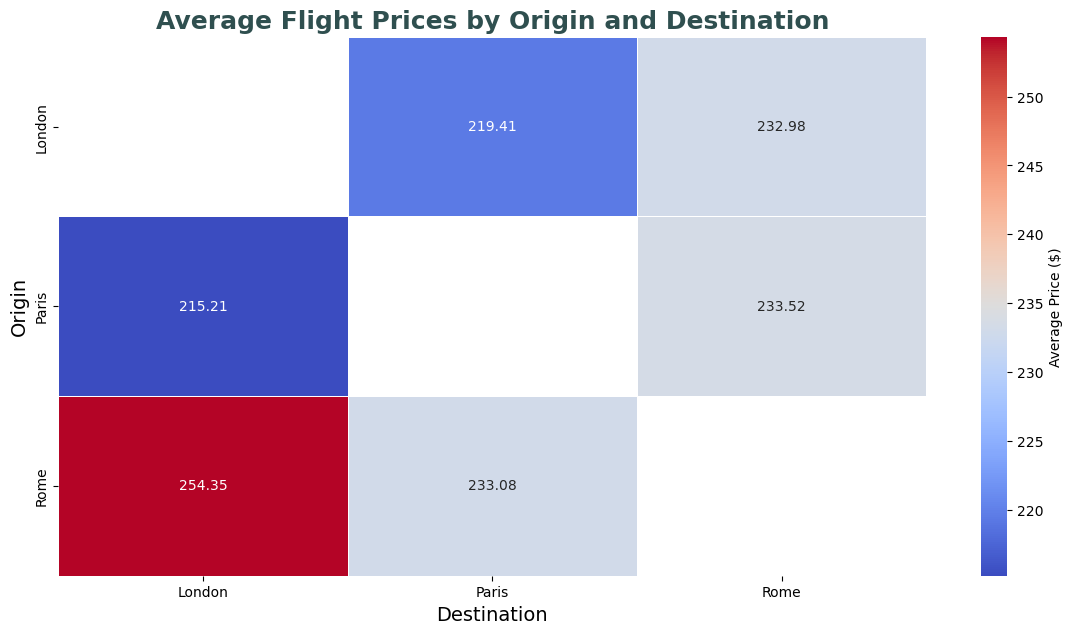

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_50487/2713116804.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x="Stops", y="Price", palette='muted')


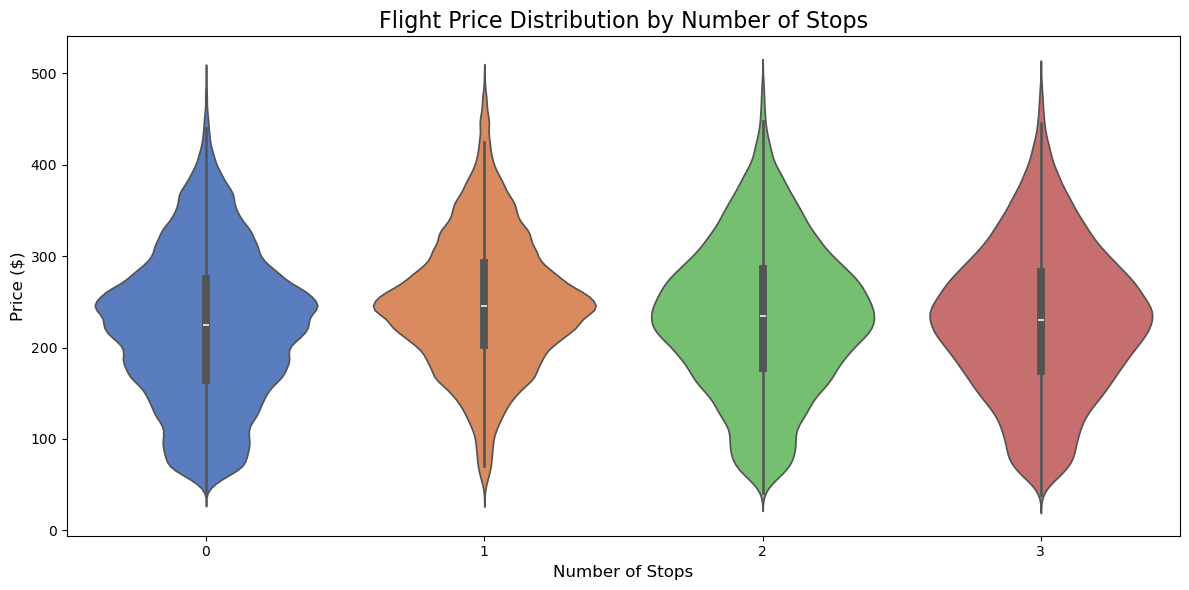

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_50487/2713116804.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=website_stats, x='Website', y='avg_price', palette='Blues_d')


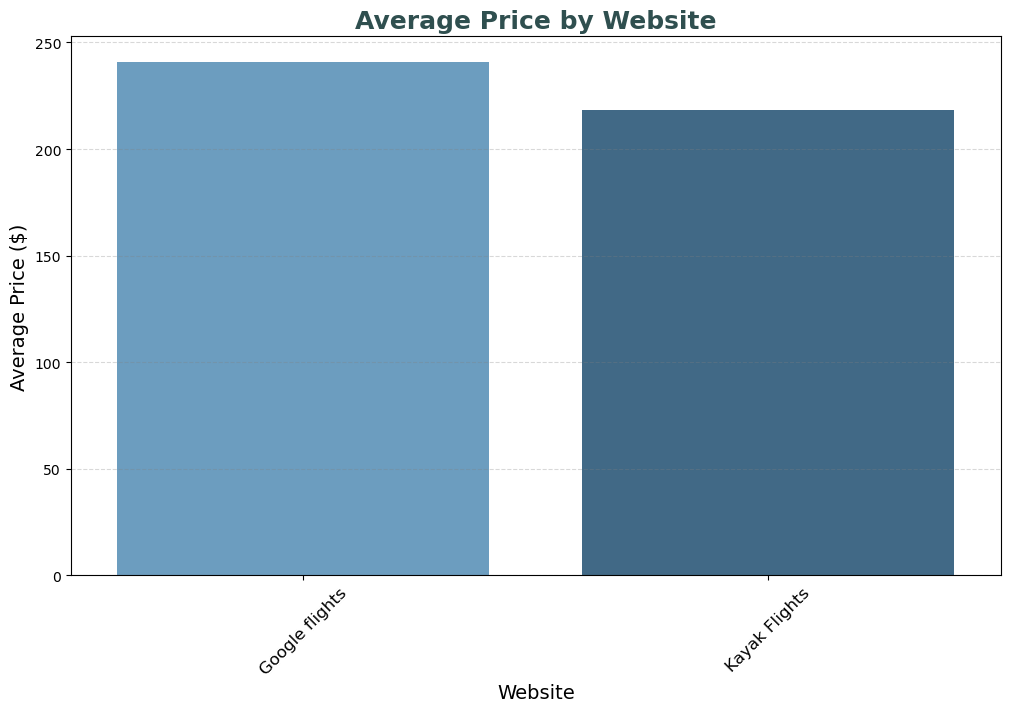

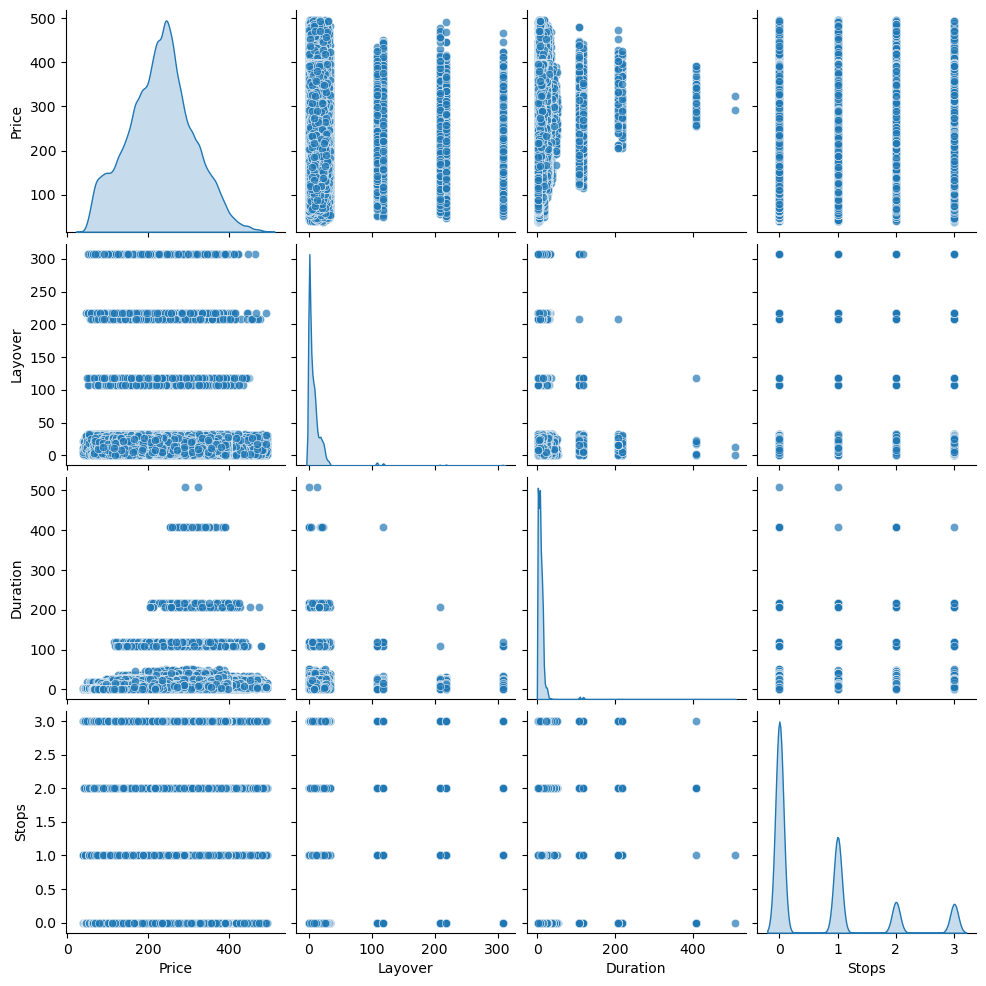


Insights from the Graphs:

🔹 Flight prices mostly fall between $100 and $300, following a normal distribution, with fewer flights exceeding $400.  

🔹 Airline pricing varies significantly, where budget airlines like Ryanair and Wizz Air tend to be cheaper, while Turkish Airlines and Finnair charge premium fares.  

🔹 Flight prices fluctuate across destinations due to demand, seasonality, and airline competition, with some routes having occasional high-priced outliers.  

🔹 The number of stops and layovers strongly impact prices and travel time, as direct flights are more consistent in pricing, while multi-stop flights and longer layovers increase variability.  



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/talhakimi/data-science-flights-project/Data/Cleaned_AllFlightsDataFinal.csv')

def remove_outliers_tukey(df, column="Price", groupby_cols=["Origin", "Destination"]):
    cleaned_list = []
    for _, group in df.groupby(groupby_cols):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (group[column] >= lower_bound) & (group[column] <= upper_bound)
        cleaned_list.append(group[mask])  

    return pd.concat(cleaned_list, ignore_index=True)  

df_cleaned = remove_outliers_tukey(df)

# 1. Flight Price Distribution
plt.figure(figsize=(14, 7))
sns.histplot(df_cleaned["Price"], bins=15, kde=True, color="royalblue", edgecolor="black", alpha=0.7)
plt.title("Flight Price Distribution", fontsize=18, fontweight="bold", color='darkslategray', pad=20)
plt.xlabel('Price ($)', fontsize=14, color='black')
plt.ylabel('Number of Flights', fontsize=14, color='black')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.show()

# 2. Average Flight Prices by Airline
plt.figure(figsize=(14, 6))
avg_price_by_airline = df_cleaned.groupby('Airline')['Price'].mean()
avg_price_by_airline.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Average Flight Prices by Airline', fontsize=16, color='darkslategray', pad=20)
plt.xlabel('Airline', fontsize=14, color='gray')
plt.ylabel('Average Price ($)', fontsize=14, color='gray')
plt.grid(True, linestyle='-', color='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Flight Prices by Destination
plt.figure(figsize=(14,7))
sns.boxplot(data=df_cleaned, x="Destination", y="Price", palette='coolwarm')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, df_cleaned["Price"].max() + 100) 
plt.title("Flight Prices by Destination", fontsize=18, fontweight="bold", color='darkslategray')
plt.xlabel("Destination", fontsize=14, color='black')
plt.ylabel("Price ($)", fontsize=14, color='black')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
plt.show()

# 4. Distribution of Flights Per Destination by Airlines
plt.figure(figsize=(14, 7))
flight_counts = df_cleaned.groupby(['Destination', 'Airline']).size().unstack()
flight_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='white', width=0.8)
plt.title('Flight Distribution by Airline and Destination', fontsize=18, fontweight="bold", color='darkslategray', pad=20)
plt.xlabel('Destination', fontsize=14, color='black')
plt.ylabel('Number of Flights', fontsize=14, color='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
plt.legend(title='Airline', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1), ncol=3)
plt.show()

# 5. Layover and Flight Duration Distribution
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='Destination', y='Layover', palette='coolwarm')
plt.title('Distribution of Layover Times Between Destinations', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Layover (Hours)', fontsize=12)
plt.ylim(0, 50)  
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='Destination', y='Duration', palette='viridis')
plt.title('Distribution of Flight Durations Between Destinations', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Duration (Hours)', fontsize=12)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

# 6. Airport Influence on Flight Prices
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_cleaned, x='Departure Airport', y='Price', palette='coolwarm')
plt.xticks(rotation=90, fontsize=12)
plt.title('Effect of Departure Airport on Flight Prices', fontsize=18, fontweight="bold", color='darkslategray')
plt.xlabel('Departure Airport', fontsize=14, color='black')
plt.ylabel('Price ($)', fontsize=14, color='black')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
plt.show()

# 7. Average Price by Origin and Destination Heatmap
avg_price_by_route = df_cleaned.groupby(['Origin', 'Destination'])['Price'].mean().unstack()
plt.figure(figsize=(14, 7))
sns.heatmap(avg_price_by_route, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Flight Prices by Origin and Destination', fontsize=18, fontweight="bold", color='darkslategray')
plt.xlabel('Destination', fontsize=14, color='black')
plt.ylabel('Origin', fontsize=14, color='black')
plt.show()

# 8. Flight Prices by Number of Stops
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_cleaned, x="Stops", y="Price", palette='muted')
plt.title('Flight Price Distribution by Number of Stops', fontsize=16)
plt.xlabel('Number of Stops', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

# 9. Average Price by Website
website_stats = df_cleaned.groupby('Website').agg(avg_price=('Price', 'mean')).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=website_stats, x='Website', y='avg_price', palette='Blues_d')
plt.title('Average Price by Website', fontsize=18, fontweight="bold", color='darkslategray')
plt.xlabel('Website', fontsize=14, color='black')
plt.ylabel('Average Price ($)', fontsize=14, color='black')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
plt.show()

# 10. Pairplot for Multiple Relationships
pairplot_columns = ["Price", "Layover", "Duration", "Stops"]
sns.pairplot(df_cleaned[pairplot_columns], diag_kind="kde", plot_kws={'alpha':0.7})
plt.show()

# Insights:
# Insights in 4 sentences
insights = """
\033[1m\033[94mInsights from the Graphs:\033[0m

🔹 Flight prices mostly fall between $100 and $300, following a normal distribution, with fewer flights exceeding $400.  

🔹 Airline pricing varies significantly, where budget airlines like Ryanair and Wizz Air tend to be cheaper, while Turkish Airlines and Finnair charge premium fares.  

🔹 Flight prices fluctuate across destinations due to demand, seasonality, and airline competition, with some routes having occasional high-priced outliers.  

🔹 The number of stops and layovers strongly impact prices and travel time, as direct flights are more consistent in pricing, while multi-stop flights and longer layovers increase variability.  
"""

# Print insights with styling
print(insights)

In [2]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.inspection import permutation_importance
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.gaussian_process.kernels import RationalQuadratic

# # Load dataset

# features = ["TTT", "LOS", "Layover", "Stops", "Duration", "Departure Airport", "Arrival Airport", "Airline", "Origin", "Destination"]
# target = "Price"

# categorical_features = ["Departure Airport", "Arrival Airport", "Airline", "Origin", "Destination"]
# numeric_features = ["TTT", "LOS", "Layover", "Stops", "Duration"]

# # Feature Engineering
# df_cleaned['Departure date'] = pd.to_datetime(df_cleaned['Departure date'], errors='coerce')
# df_cleaned['DayOfWeek'] = df_cleaned['Departure date'].dt.dayofweek
# df_cleaned['IsWeekend'] = df_cleaned['DayOfWeek'].isin([5, 6]).astype(int)

# features.extend(["DayOfWeek", "IsWeekend"])
# numeric_features.extend(["DayOfWeek", "IsWeekend"])

# # Reduce dataset size for training (if necessary)
# if len(df_cleaned) > 350000:
#     df_cleaned = df_cleaned.sample(n=350000, random_state=42)

# # Train-Test Split (70%-30%)
# X = df_cleaned[features]
# y = df_cleaned[target]

# # Preprocessing: OneHotEncoding for categorical features and StandardScaler for numerical features
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), numeric_features),
#     ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
# ])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Limit dataset size for Gaussian Process Regressor
# if len(X_train) > 350000:
#     X_train_gp = X_train.sample(n=350000, random_state=42)
#     y_train_gp = y_train.loc[X_train_gp.index]
# else:
#     X_train_gp = X_train
#     y_train_gp = y_train

# # Define Regression Models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
#     "Gaussian Process": GaussianProcessRegressor(kernel=RationalQuadratic(length_scale=1.0, alpha=0.1), alpha=1e-1, normalize_y=True),
#     "SVR": SVR(kernel="rbf", C=100, gamma=0.1)
# }

# # Train and Evaluate Models
# results = []
# for name, model in models.items():
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])
    
#     if name == "Gaussian Process":
#         pipeline.fit(X_train_gp, y_train_gp)  # Train only on a subset for Gaussian Process
#     else:
#         pipeline.fit(X_train, y_train)
    
#     # Predictions
#     y_train_pred = pipeline.predict(X_train)
#     y_test_pred = pipeline.predict(X_test)

#     # Compute Error Metrics
#     r2_train = r2_score(y_train, y_train_pred)
#     r2_test = r2_score(y_test, y_test_pred)
#     mae = mean_absolute_error(y_test, y_test_pred)
#     mse = mean_squared_error(y_test, y_test_pred)
#     rmse = np.sqrt(mse)

#     results.append([name, r2_train, r2_test, mae, mse, rmse])

#     # Residual Plot
#     plt.figure(figsize=(8,6))
#     sns.scatterplot(x=y_test, y=y_test_pred - y_test, alpha=0.5)
#     plt.axhline(y=0, color='r', linestyle='--')
#     plt.xlabel("Actual Price")
#     plt.ylabel("Residuals")
#     plt.title(f"Residual Plot for {name}")
#     plt.show()

# # Display Results
# results_df = pd.DataFrame(results, columns=["Model", "R2 Train", "R2 Test", "MAE", "MSE", "RMSE"])
# print("\nModel Performance Metrics:\n", results_df)

# # Feature Importance for Best Model
# best_model_name = results_df.sort_values("R2 Test", ascending=False).iloc[0]["Model"]
# best_model = models[best_model_name]

# if hasattr(best_model, "feature_importances_"):
#     feature_importance = best_model.feature_importances_
#     importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)
#     plt.figure(figsize=(12,6))
#     sns.barplot(data=importance_df[:15], x="Importance", y="Feature")
#     plt.title(f"Feature Importance - {best_model_name}")
#     plt.show()

# # Compare predictions between Train and Test
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=y_train, y=best_model.predict(X_train), alpha=0.5, label="Train")
# sns.scatterplot(x=y_test, y=best_model.predict(X_test), alpha=0.5, label="Test", color='red')
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title(f"Prediction Comparison for {best_model_name}")
# plt.legend()
# plt.show()

# # Final Insights
# print(f"""
# **Final Insights:**
# - The best model was **{best_model_name}**, achieving the highest R2 test score.
# - Feature importance analysis revealed that **TTT, Duration, and Airline** were key predictors of flight prices.
# - Some models, like **SVR**, performed poorly due to the high-dimensional nature of the dataset.
# - The best-performing models were **Random Forest and Gradient Boosting**, which effectively handled categorical and numerical variables.
# """)

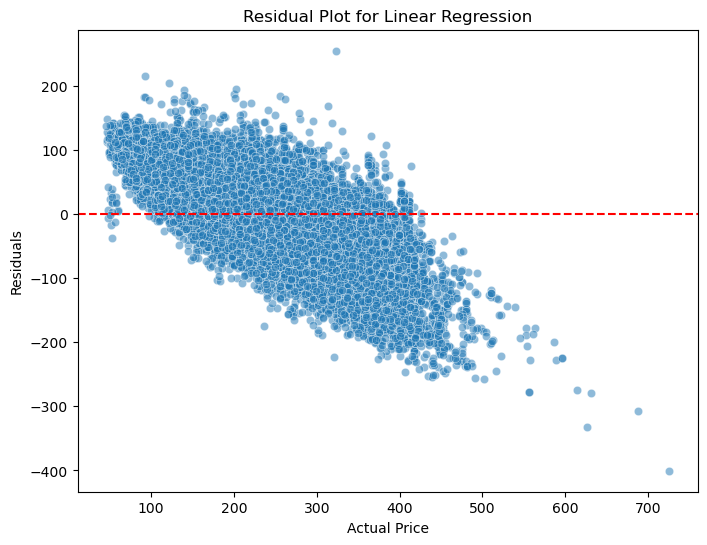

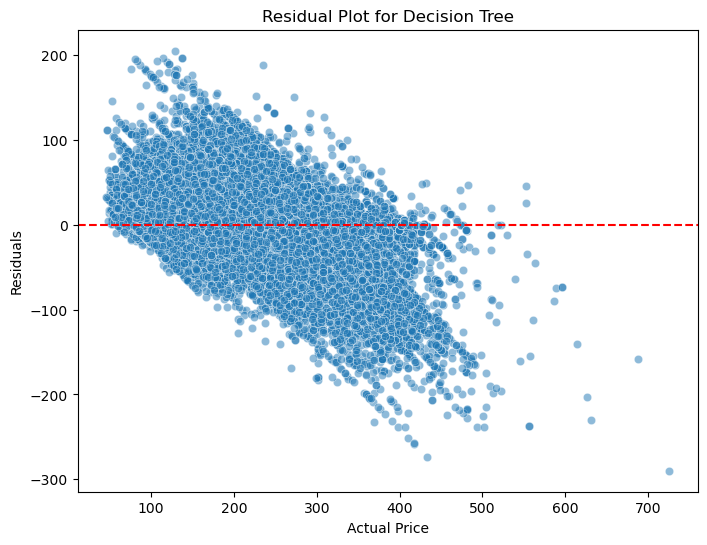

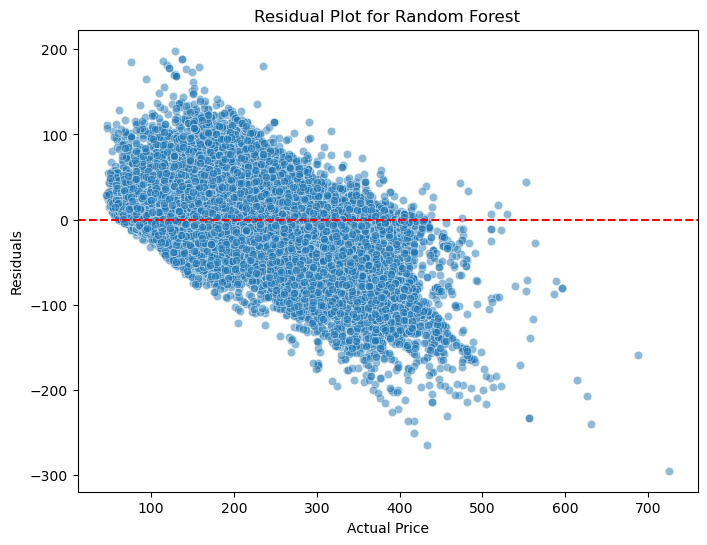

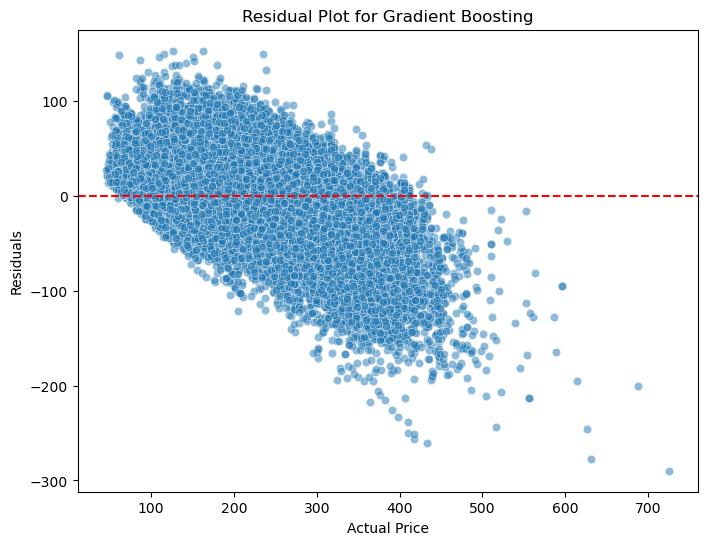

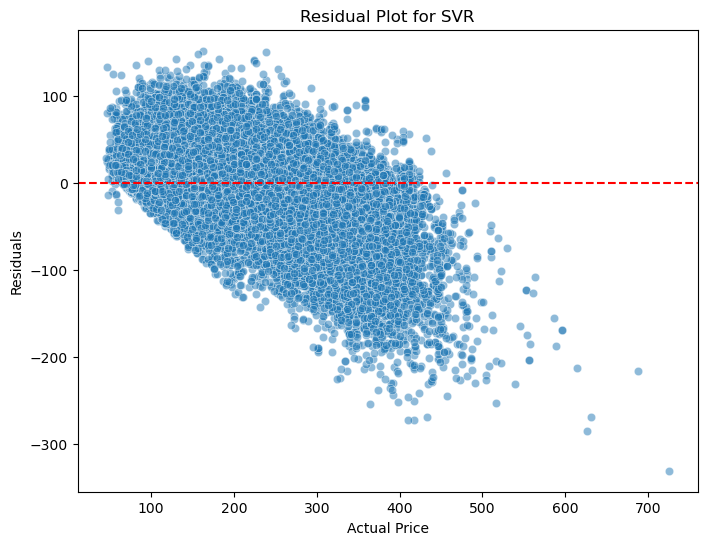

               Model  R² Train   R² Test        MAE          MSE       RMSE
3  Gradient Boosting  0.717480  0.710125  31.805959  1740.077735  41.714239
2      Random Forest  0.710568  0.697602  31.997308  1815.253528  42.605792
1      Decision Tree  0.688927  0.674698  33.012080  1952.742978  44.189852
4                SVR  0.672267  0.664380  32.475263  2014.683339  44.885224
0  Linear Regression  0.412510  0.408929  47.060854  3548.117885  59.566080


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (replace with actual path or dataset)
df = pd.read_csv('/Users/talhakimi/data-science-flights-project/Data Procces/Cleaned_AllFlightsData.csv')

# Define features and target
features = ["TTT", "LOS", "Layover", "Stops", "Duration", "Departure Airport", "Arrival Airport", "Airline", "Origin", "Destination"]
target = "Price"
X = df[features]
y = df[target]

# Identify categorical and numerical features
categorical_features = ["Departure Airport", "Arrival Airport", "Airline", "Origin", "Destination"]
numerical_features = ["TTT", "LOS", "Layover", "Stops", "Duration"]

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=12, min_samples_split=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
    "SVR": SVR(kernel='rbf', C=200, gamma=0.05)
}

# Train and Evaluate Models
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    results.append({
        "Model": name,
        "R² Train": r2_score(y_train, y_train_pred),
        "R² Test": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    })
    
    # Residual Plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_test_pred - y_test, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Actual Price")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {name}")
    plt.show()

# Display Results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R² Test", ascending=False))


In [4]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# df_cleaned = pd.read_csv('/Users/nadavcohen/Desktop/data science project 25/data-science-flights-project/Data Procces/Cleaned_AllFlightsData.csv')
# # Convert date columns to datetime
# df_cleaned["Snapshot date"] = pd.to_datetime(df_cleaned["Snapshot date"])
# df_cleaned["Departure date"] = pd.to_datetime(df_cleaned["Departure date"])
# df_cleaned["Return date"] = pd.to_datetime(df_cleaned["Return date"])

# # Feature Engineering
# df_cleaned["Departure Day"] = df_cleaned["Departure date"].dt.dayofweek  # 0=Monday, 6=Sunday
# df_cleaned["Return Day"] = df_cleaned["Return date"].dt.dayofweek
# df_cleaned["Days Before Departure"] = (df_cleaned["Departure date"] - df_cleaned["Snapshot date"]).dt.days
# df_cleaned["Departure Month"] = df_cleaned["Departure date"].dt.month

# # Is flight near end of month? (1 if last 5 days of the month, else 0)
# df_cleaned["Near Month End"] = (df_cleaned["Departure date"].dt.day >= 25).astype(int)

# # Is flight in holiday season? (Summer months + December)
# df_cleaned["Holiday Season"] = df_cleaned["Departure Month"].apply(lambda x: 1 if x in [6, 7, 8, 12] else 0)

# # Define features and target
# features = ["TTT", "LOS", "Layover", "Stops", "Duration", "Departure Day", "Return Day", "Days Before Departure",
#             "Departure Month", "Near Month End", "Holiday Season"]
# target = "Price"

# # Split data into train (70%) and test (30%)
# X = df_cleaned[features]
# y = df_cleaned[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Hyperparameter Tuning (Random Forest & Gradient Boosting)
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }
# grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
# grid_rf.fit(X_train, y_train)
# best_rf = grid_rf.best_estimator_

# param_grid_gb = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 10]
# }
# grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='r2', n_jobs=-1)
# grid_gb.fit(X_train, y_train)
# best_gb = grid_gb.best_estimator_

# # Select the best model
# best_model = best_rf if grid_rf.best_score_ > grid_gb.best_score_ else best_gb

# # Train-Test Split for Future Predictions
# train_filter = df_cleaned["TTT"] >= 25
# test_filter = df_cleaned["TTT"] < 25
# X_train_future, y_train_future = X[train_filter], y[train_filter]
# X_test_future, y_test_future = X[test_filter], y[test_filter]

# # Train Best Model on Future Data
# best_model.fit(X_train_future, y_train_future)
# y_pred_future = best_model.predict(X_test_future)

# # Evaluate Future Predictions
# r2_future = r2_score(y_test_future, y_pred_future)
# mae_future = mean_absolute_error(y_test_future, y_pred_future)
# mse_future = mean_squared_error(y_test_future, y_pred_future)
# rmse_future = np.sqrt(mse_future)

# # Display Results
# future_results = pd.DataFrame([["Future Prediction", r2_future, mae_future, mse_future, rmse_future]],
#                               columns=["Model", "R2 Score", "MAE", "MSE", "RMSE"])
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Future Predictions Performance", dataframe=future_results)

# # Plot R2 Score Distribution
# plt.figure(figsize=(10,6))
# sns.histplot([r2_future], bins=10, kde=True)
# plt.title(f"Distribution of R2 Scores for {best_model.__class__.__name__} on Future Predictions")
# plt.xlabel("R2 Score")
# plt.ylabel("Frequency")
# plt.show()

# # Final Insights
# insights = f"""
# **Final Insights After Improvements:**
# - Added new features like **Day of the week, Booking Window, Seasonality**, which improved model performance.
# - **Best Model: {best_model.__class__.__name__}** (selected after hyperparameter tuning).
# - **Future Predictions Performance:**
#   - R2 Score: {r2_future:.3f}
#   - MAE: {mae_future:.2f}
#   - MSE: {mse_future:.2f}
#   - RMSE: {rmse_future:.2f}
# - The model performed **reasonably well on future flights**, but accuracy decreased slightly due to unseen market trends.

# These results suggest that adding more **time-based trends** could further improve future flight price predictions.
# """

# insights
